In [22]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

plt.style.use('seaborn-talk')

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 随机选取几条数据
idx = range(df.shape[0])
np.random.shuffle(idx)

print(iris.target_names)
df.iloc[idx].head(10)

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
99,5.7,2.8,4.1,1.3,1
122,7.7,2.8,6.7,2.0,2
134,6.1,2.6,5.6,1.4,2
40,5.0,3.5,1.3,0.3,0
110,6.5,3.2,5.1,2.0,2
22,4.6,3.6,1.0,0.2,0
105,7.6,3.0,6.6,2.1,2
77,6.7,3.0,5.0,1.7,1
13,4.3,3.0,1.1,0.1,0
125,7.2,3.2,6.0,1.8,2


In [6]:
df.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [14]:
for t in [2,4]:
    print df[ df['petal length (cm)'] < t].target.value_counts()

0    50
Name: target, dtype: int64
0    50
1    11
Name: target, dtype: int64


In [15]:
def H(arr):
    n = sum(arr)
    arr = [1.0*i/n for i in arr]
    return sum([- p * np.log(p) for p in arr if p >0])

In [19]:
H([50,11,0])*61/150 + H([0, 39, 50])*89/150 - H([50,50,50])

-0.49998635614757936

In [26]:
from sklearn.datasets import load_iris
import numpy as np
from scipy import stats

def H(arr):
    """计算熵的函数"""
    n = sum(arr)
    arr = [1.0*i/n for i in arr]
    return sum([- p * np.log(p) for p in arr if p >0])

def InformactionInc(x, y, split):
    """计算利用split分裂特征x时，信息增益
    x : np.array 特征数组, size= (样本数, )
    y : np.array 类别， size=(样本数, )
    split : double 候选分裂点的值
    
    return : 信息增益
    """
    delta = 0
    
    # Your Code
    
    # end
    
    return delta

def FindSpliter(X, y):
    """寻找最佳分裂特征和分裂点算法
    X : np.array 特征，size = (样本数, 特征数) 
    y : np.array 类别，size = (样本数, )
    return (分裂特征索引 i, 分裂点的值 t)
    """
    n_samples , n_features = X.shape
    
    max_infor_inc = 0
    best_feature = 0
    best_split_value = None
    
    # Your Code
    
    # end
        
    return best_feature, best_split_value


def TreeGenerate(X, y, depth=0, max_depth=3):
    """决策树生成算法，返回一棵树
    """
    # 满足不分裂准则
    if X.shape[0] < 10 or np.unique(y).shape[0] == 1 or depth >= max_depth:
        node = {'prediction' : stats.mode(y)[0][0]}
        return node
    
    # 继续分裂
    best_feature, best_split_value = FindSpliter(X, y)
    mask = X[:, best_feature] < best_split_value
    node = {
        'left' : TreeGenerate(X[mask, :], y[mask], depth+1),
        'right' : TreeGenerate(X[~mask, :], y[~mask], depth+1)
    }
    return node

def TreePredict(X, T):
    """实现决策树预测算法"""
    pass


iris = load_iris()
T = TreeGenerate(iris.data, iris.target)
print(T)

print( 'ACC: {}'.format(np.mean(TreePredict(X, T) == iris.target)) )

UnboundLocalError: local variable 'mostfrequent' referenced before assignment

In [21]:
np.unique([1,2,1,1,1]).shape

(2,)

In [25]:
stats.mode([1,2,1,1,1])[0][0]

1.0

Text(6.5,1.6,u'petal width < 1.75')

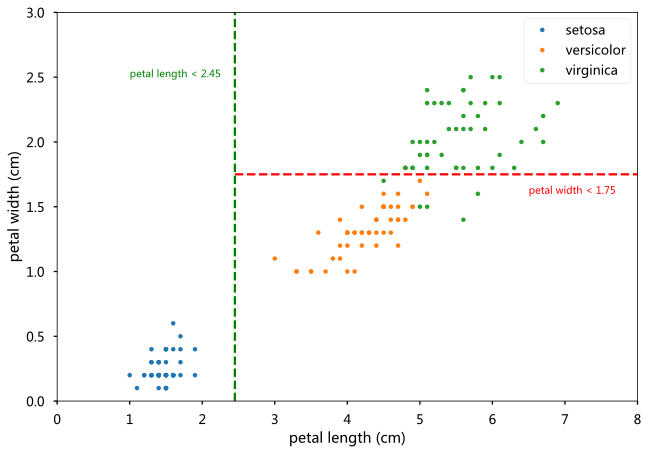

In [49]:
ax = plt.gca()
df.groupby(by='target').plot(kind='line', x='petal length (cm)', y='petal width (cm)', style='.', ax=ax)
ax.set_xlim([0,8])
ax.set_ylim([0,3])
plt.legend(iris.target_names, loc='best')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.axhline(y=1.75, xmin=2.45/8.0, xmax=1.0, color='r', linestyle='--')
plt.axvline(x=2.45, color='g', linestyle='--')

plt.text(1., 2.5, 'petal length < 2.45', color='g')
plt.text(6.5, 1.6, 'petal width < 1.75', color='r')